<a href="https://colab.research.google.com/github/shanakiyu/2024-projet-final-VIVIERBARTE-NINA/blob/main/projet_linguistique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# est ce que les pays les plus heureux ont plus de mots pour exprimer le bonheur ?
ou est ce que cest de la colexification aussi

# 1. INTRODUCTION

en gros on prend l'indice de bonheur des pays et on voit s'ils parlent plus positivement mais comme premiere etude on va deja voir sils ont plusieurs mots pour exprimer le concept du bonheur.
on decide qu'on en comptre que la langue la plus parlée du pays ou quelque chose du genre. et qu'on prend le concept du bonheur dans lexibank donc deja voir s'ils ont des mots differentrs pour bonheur et joie.

la prediction a laquelle on s'attend cest qu'il y ait plus des mots differents pour bonheur et joie dazns les pays considéré comme les plus heureux.

on va d'abord sur lexibank pour prendre la liste de langues et de forme pour le concept de bonheur "happiness".
ensuite on va cherhcer a a ssigner une langue ou plus je sais pas encore a un pays pour pouvoir merge avec un dataset avec les indices de bonheur de chaque pays.
et enfin apres on fera une analyse classique
avec indice de bonheur c'est continue
et le nombre de terms pour bonheur cest categorielle je pense genre "same" pour joy et happiness et "different" si y en a deux ou plus
donc t test je crois jai pas tro refelchis

et a la fin je fais un world map pour mettre en relief les pyas les plus heureux et par dessus ce qui ont plusieurs termes pour le concept du bonheur.


LES LIMITES  DE L'ANALYSE

Mentionnez que le choix d'une seule langue par pays est une simplification et que cela pourrait ne pas refléter toute la diversité linguistique d'un pays.

Expliquez que Lexibank ne couvre pas nécessairement tous les synonymes ou nuances lexicales et que votre analyse repose sur les données disponibles.

Reconnaissez que corréler un concept linguistique (lexique) à un indice social (bonheur) est une exploration indirecte qui ne prouve pas de lien causal.

Sources des données : Mentionnez que vous utilisez Lexibank, une ressource précieuse mais possiblement incomplète pour certains concepts lexicaux.
Conséquences potentielles : Indiquez que cette incomplétude pourrait affecter les résultats (par exemple, sous-estimer la diversité lexicale d'une langue).
Suggestions pour des recherches futures : Proposez de croiser ces données avec d'autres bases (WordNet, Wiktionnaire, ou corpus linguistiques) ou de mener des analyses plus approfondies, incluant des recherches culturelles et historiques sur les langues étudiées.


# 2. LIBRARY IMPORT

In [77]:
!pip install basemap

import pandas as pd # data-frame manipulation
from tqdm.auto import tqdm # progress bar
import matplotlib.pyplot as plt # plotting
import seaborn as sns # plotting
import numpy as np # linear algebra
import requests # fetching data from the internet
from scipy import stats # statistical tests
from google.colab import files
from IPython.display import display, Image
import io


# set the plot style
sns.set(context='paper', style='ticks',
        font_scale=1, palette='colorblind')

# 3. DATA IMPORT AND MANIPULATION


## 3.1. Extracting data from Lexibank

First, we will need to extract data from Lexibank. It has been conveniently gathered for you by the creators of this database, so you can look at it below:

In [101]:
all_lexibank = pd.read_csv('https://github.com/alexeykosh/intro-to-ling/raw/refs/heads/main/S8/lexibank_clipped.csv',
                           low_memory=False, index_col=0)
all_lexibank.head(5)

,Language_ID,Form,Latitude,Longitude,Glottocode,Concepticon_Gloss,Family
0,aaleykusunda-KusundaK,ɐ̃ː.ʤi,28.000000,82.260000,kusu1250,ABOVE,NaN
1,abrahammonpa-MonpaKalaktang,thuŋga,27.104162,92.113017,kala1376,ABOVE,Sino-Tibetan
2,abrahammonpa-MonpaDirang,thuŋga,27.349590,92.279140,tsha1245,ABOVE,Sino-Tibetan
3,abrahammonpa-MonpaChangprong,jur,27.578928,91.876393,dakp1242,ABOVE,Sino-Tibetan
4,abrahammonpa-SartangDarbuB,khuŋlo,27.329171,92.358727,sart1249,ABOVE,Sino-Tibetan


Ok, now let's focus on our hypothesis. We are interested in two senses from lexibank, namely HAPPINESS and JOY. Let's store them in a list as strings:
then We will not need all the columns, but we will need the following four:

In [102]:
terms_for_Happiness = [
    "HAPPINESS", "JOY"
]
all_lexibank = all_lexibank[['Form', 'Concepticon_Gloss', 'Glottocode', 'Family']]

# Get the subset of the forms from Lexibank that contain the words for HAPPINESS and JOY:
subset_si = all_lexibank.query(f'Concepticon_Gloss in {terms_for_Happiness}')

subset_si.head(5)

,Form,Concepticon_Gloss,Glottocode,Family
660545,quɑnəʃ,JOY,kaza1248,Turkic
660546,sʊjənəʃ,JOY,kaza1248,Turkic
660547,ʃɑtdumɑn,JOY,kaza1248,Turkic
660548,quɑnəʃtələq,JOY,kaza1248,Turkic
660549,n̪əlɪʋu,JOY,nucl1305,Dravidian


In [104]:
lang_colex = []

for glottocode in subset_si.Glottocode.unique():
    data_lg = subset_si.query(f'Glottocode == "{glottocode}"')

    if data_lg.Concepticon_Gloss.nunique() >= 2:
        lang_colex.append([glottocode, len(data_lg.Form.unique())])

#lang_colex[:5]
## len(lang_colex)

#Now let's convert it into a dataframe:
df_colex = pd.DataFrame(lang_colex)
df_colex.columns = ['glottocode', 'Number_of_terms']
with pd.option_context('display.max_rows', 10, 'display.min_rows', 10):
    display(df_colex)

,glottocode,Number_of_terms
0,kaza1248,6
1,nucl1305,2
2,mala1464,3
3,tami1289,2
4,telu1262,1
...,...,...
90,lezg1247,2
91,darg1241,3
92,chec1245,3
93,stan1318,3


In [105]:
# Associating each glottocode to its name
glottolog = pd.read_csv('https://raw.githubusercontent.com/alexeykosh/intro-to-ling/refs/heads/main/S8/glottolog.csv')
with pd.option_context('display.max_rows', 10, 'display.min_rows', 10):
    display(glottolog)


,glottocode,name,isocodes,level,macroarea,latitude,longitude
0,3adt1234,3Ad-Tekles,NaN,dialect,Africa,NaN,NaN
1,aala1237,Aalawa,NaN,dialect,Papunesia,NaN,NaN
2,aant1238,Aantantara,NaN,dialect,Papunesia,NaN,NaN
3,aari1239,Aari,aiw,language,Africa,5.95034,36.5721
4,aari1240,Aariya,aay,language,Eurasia,NaN,NaN
...,...,...,...,...,...,...,...
21952,zuwa1238,Zuwadza,NaN,dialect,Papunesia,NaN,NaN
21953,zwal1238,Zwall,NaN,dialect,Africa,NaN,NaN
21954,zyph1238,Zyphe,zyp,language,Eurasia,22.52400,93.2640
21955,zyud1238,Zyuzdin,NaN,dialect,Eurasia,NaN,NaN


In [106]:
merged_df = pd.merge(df_colex, glottolog[["glottocode", "name"]], on="glottocode", how="left")
# Remplacement manuel des noms manquants
missing_names = {
    "osse1243": "Ossetian",
    "alba1267": "Albanian",
    "buri1258": "Buriat"
}

merged_df['name'] = merged_df.apply(
    lambda row: missing_names[row['glottocode']] if pd.isnull(row['name']) and row['glottocode'] in missing_names else row['name'],
    axis=1
)
# Résultat
with pd.option_context('display.max_rows', 10, 'display.min_rows', 10):
    display(merged_df)

,glottocode,Number_of_terms,name
0,kaza1248,6,Kazakh
1,nucl1305,2,Kannada
2,mala1464,3,Malayalam
3,tami1289,2,Tamil
4,telu1262,1,Telugu
...,...,...,...
90,lezg1247,2,Lezgian
91,darg1241,3,North-Central Dargwa
92,chec1245,3,Chechen
93,stan1318,3,Standard Arabic


## 3.2. Extracting data from World Happiness Index

importation d'un dataset sur l'indice de bonheur dans le monde de 2013 a 2023

In [108]:
# After running this cell, you need to load the dataset previously downloaded.
uploaded = files.upload()

Saving World Happiness Index by Reports 2013-2023 no nulls.csv to World Happiness Index by Reports 2013-2023 no nulls (3).csv


In [110]:
df = pd.read_csv(io.BytesIO(uploaded['World Happiness Index by Reports 2013-2023 no nulls (3).csv']))
with pd.option_context('display.max_rows', 10, 'display.min_rows', 10):
    display(df)

,Country,Year,Index,Rank
0,Afghanistan,2013,4.040,143
1,Afghanistan,2015,3.575,153
2,Afghanistan,2016,3.360,154
3,Afghanistan,2017,3.794,141
4,Afghanistan,2018,3.632,145
...,...,...,...,...
1518,Zimbabwe,2019,3.663,146
1519,Zimbabwe,2020,3.299,151
1520,Zimbabwe,2021,3.145,148
1521,Zimbabwe,2022,2.995,144


In [111]:
# Calculer le score de bonheur moyen pour chaque pays (2013-2023)
df_mean = (
    df.groupby("Country")["Index"]
    .mean()
    .reset_index()
    .rename(columns={"Index": "Average Happiness Score (2013-2023)"})
)

# Afficher le résultat
with pd.option_context('display.max_rows', 10, 'display.min_rows', 10):
    display(df_mean)

,Country,Average Happiness Score (2013-2023)
0,Afghanistan,3.095700
1,Albania,4.958900
2,Algeria,5.410300
3,Angola,4.215600
4,Argentina,6.275400
...,...,...
162,Venezuela,5.477700
163,Vietnam,5.331800
164,Yemen,3.729444
165,Zambia,4.350200


## 3.3. Associating each country with its spoken languages that we have data on

In [112]:
# After running this cell, you need to load the dataset previously downloaded.
uploaded = files.upload()

Saving countries-languages.csv to countries-languages (2).csv


In [113]:
df_langcountry = pd.read_csv(io.BytesIO(uploaded['countries-languages (2).csv']), delimiter=",", quotechar='"', skipinitialspace=True)

# Supposons que les données soient dans une seule colonne nommée "raw_data"
df_langcountry[["Country", "Languages Spoken"]] = df_langcountry["Country"].str.split(",", n=1, expand=True)

# Nettoyage des colonnes pour supprimer les guillemets
df_langcountry["Country"] = df_langcountry["Country"].str.strip('"')
df_langcountry["Languages Spoken"] = df_langcountry["Languages Spoken"].str.strip('"')
df_langcountry = df_langcountry.drop(columns=["Languages Spoken;"])  # Remplace par le vrai nom de la colonne si différent
df_langcountry["Languages Spoken"] = df_langcountry["Languages Spoken"].str.rstrip('";').str.strip()

# Afficher le DataFrame
with pd.option_context('display.max_rows', 10, 'display.min_rows', 10):
    display(df_langcountry)


,Country,Languages Spoken
0,Afghanistan,"Dari Persian, Pashtu, Turkic, Northern Pashto,..."
1,Albania,"Albanian, Greek"
2,Algeria,"Arabic, French, Standard Arabic"
3,Andorra,"Catalan, French, Castilian, Portuguese"
4,Angola,"Portuguese, Bantu"
...,...,...
193,Vietnam,Vietnamese
194,Western Sahara (proposed state),"Hassaniya Arabic, Moroccan Arabic"
195,Yemen,Standard Arabic
196,Zambia,"English, Bemba, Kaonda, Lozi, Lunda, Luvale, N..."


In [114]:

# Créer une fonction pour associer les langues à chaque pays
def find_languages_for_country(country_name):
    # Récupérer les langues du pays dans la colonne 'Languages Spoken'
    country_row = df_langcountry[df_langcountry['Country'] == country_name]
    if not country_row.empty:
        country_languages = country_row['Languages Spoken'].values[0]
        country_languages = [lang.strip() for lang in country_languages.split(",")]  # Diviser en langues

        # Vérifier les langues du df_colex et les associer si elles sont présentes dans 'Languages Spoken'
        languages_in_country = [lang for lang in merged_df['name'] if lang.lower() in [l.lower() for l in country_languages]]
        return languages_in_country
    return []

# Appliquer cette fonction à chaque pays dans df_langcountry pour obtenir les langues associées
df_langcountry['Languages_in_Country'] = df_langcountry['Country'].apply(find_languages_for_country)

# Afficher le résultat
with pd.option_context('display.max_rows', 10, 'display.min_rows', 10):
    display(df_langcountry)


,Country,Languages Spoken,Languages_in_Country
0,Afghanistan,"Dari Persian, Pashtu, Turkic, Northern Pashto,...","[Northern Pashto, Northern Uzbek]"
1,Albania,"Albanian, Greek",[Albanian]
2,Algeria,"Arabic, French, Standard Arabic","[French, Standard Arabic]"
3,Andorra,"Catalan, French, Castilian, Portuguese","[Catalan, French, Portuguese]"
4,Angola,"Portuguese, Bantu",[Portuguese]
...,...,...,...
193,Vietnam,Vietnamese,[]
194,Western Sahara (proposed state),"Hassaniya Arabic, Moroccan Arabic",[]
195,Yemen,Standard Arabic,[Standard Arabic]
196,Zambia,"English, Bemba, Kaonda, Lozi, Lunda, Luvale, N...",[]


## 3.4. Concatenation of dataset (languages in the country et happiness score en fonction country)

In [115]:
# Exemple de préparation : uniformiser les noms de pays
df_langcountry['Country'] = df_langcountry['Country'].str.strip().str.lower()
df_mean['Country'] = df_mean['Country'].str.strip().str.lower()

# Merge sur la colonne "Country"
final_df = pd.merge(df_langcountry, df_mean, on='Country', how='left')

# Ajouter la colonne 'Languages_in_Country' à partir de df_langcountry si elle n'est pas déjà dans final_df
if 'Languages_in_Country' not in final_df.columns:
    final_df['Languages_in_Country'] = df_langcountry.set_index('Country').reindex(final_df['Country'])['Languages_in_Country'].values

# Garder uniquement les pays présents dans df_mean
final_df = final_df[final_df['Average Happiness Score (2013-2023)'].notna()]

# Supprimer les lignes où la colonne 'Languages_in_Country' est une liste vide
final_df = final_df[final_df['Languages_in_Country'].apply(lambda x: len(x) > 0 if isinstance(x, list) else False)]

# Supprimer la colonne "Languages Spoken" si elle existe
if 'Languages Spoken' in final_df.columns:
    final_df = final_df.drop(columns=['Languages Spoken'])

# Afficher le résultat
with pd.option_context('display.max_rows', 10, 'display.min_rows', 10):
    display(final_df)



,Country,Languages_in_Country,Average Happiness Score (2013-2023)
0,afghanistan,"[Northern Pashto, Northern Uzbek]",3.095700
1,albania,[Albanian],4.958900
2,algeria,"[French, Standard Arabic]",5.410300
4,angola,[Portuguese],4.215600
6,argentina,"[Spanish, German, French, Italian]",6.275400
...,...,...,...
187,united states,[Spanish],6.983800
188,uruguay,[Spanish],6.435000
189,uzbekistan,"[Russian, Northern Uzbek]",6.036800
192,venezuela,[Spanish],5.477700


## 3.5. Assigning coefficients to each languages spoken in those countries pour arriver a un nombre de termes moyen par pays

EN GROS FAUT DIRE QUELLE A ETE LA METHODOLOGIE POUR CHOISIR LES COEFF DES LANGUES

In [133]:
# Dictionnaire des coefficients par pays et langue
coefficients_par_pays = {
    'afghanistan' : {'northern pashto' : 0.04, 'northern uzbek' : 0.1},
    'albania' : {'albanian' : 0.89},
    'algeria' : {'french' : 0.33, 'standard arabic': 0.8},
    'angola' : {'portuguese' : 0.7},
    'argentina' : {'spanish' : 0.9, 'german' : 0.02, 'french' : 0.01, 'italian' : 0.04},
    'armenia' : { 'russian' : 0.78, 'eastern armenian' : 0.98, 'northern kurdish' : 0.07},
    'austria' : {'german': 0.89, 'hungarian' : 0.01, 'slovenian' : 0.5},
    'azerbaijan' : {'russian' : 0.01, 'northern kurdish' : 0.0007, 'north azerbaijani' : 0.92, 'avar' : 0.005, 'lezgian' : 0.1},
    'belarus' : {'russian' : 0.42, 'belarusian' : 0.53},
    'belgium' : {'german' : 0.1, 'french' : 0.41},
    'belize' : {'spanish' : 0.56},
    'benin' : {'french' : 0.35},
    'bolivia' : {'spanish' : 0.93},
    'brazil' : {'spanish' : 0.3 , 'french' : 0.01, 'portuguese' : 0.93},
    'bulgaria' : {'turkish': 0.09, 'bulgarian' : 0.85},
    'burkina faso' : {'french' : 0.01},
    'burundi' : {'french' : 0.12},
    'cambodia' : {'french' : 0},
    'cameroon' : {'french' : 0.83},
    'canada' : {'french' : 0.2},
    'central african republic' : {'french' : 0.24},
    'chad' : {'french' : 0.13, 'standard arabic': 0.02},
    'chile' : {'spanish' : 0.93},
    'china' : {'evenki': 0.01, 'manchu' : 0, 'nanai' : 0},
    'colombia': {'spanish' : 0.99},
    'comoros' : {'french' : 0.26, 'standard arabic': 0.4},
    'costa rica' : {'spanish' : 0.9},
    'croatia' : {'croatian standard' : 0.96},
    'cyprus' : {'modern greek' : 0.8, 'turkish' : 0.18},
    'denmark' : {'german' : 0.4, 'danish' : 0.92, 'kalaallisut' : 0.01},
    'djibouti' : {'french' : 0.5},
    'ecuador' : {'spanish' : 0.8},
    'egypt' : {'french' : 0.01, 'standard arabic': 0.7},
    'el salvador' : {'spanish' : 0.92},
    'estonia' : {'russian' : 0.30, 'estonian' : 0.69},
    'ethiopia' : {'standard arabic' : 0},
    'finland' : {'swedish' : 0.05, 'finnish' : 0.84, 'karelian' : 0, 'livvi' : 0, 'north saami' : 0, 'inari saami' : 0, 'skolt saami' : 0},
    'france' : {'breton' : 0.03, 'catalan' : 0.0004, 'french' : 0.9, 'basque' : 0.0004},
    'gabon' : {'french' : 0.8},
    'georgia' : {'russian' : 0.01, 'eastern armenian' : 0.04, 'georgian' : 0.88, 'ossetian' : 0, 'north azerbaijani' : 0.06, 'abkhaz' : 0},
    'greece' : {'modern greek' : 0.87},
    'guatemala' : {'spanish' : 0.69},
    'guinea' : {'french' : 0.2},
    'haiti' : {'french' : 0.2},
    'honduras' : {'spanish' :0.91},
    'hungary' : {'hungarian' : 0.99},
    'iceland': {'icelandic' : 0.97},
    'india' : {'kannada' : 0.04, 'malayalam' : 0.03, 'tamil' : 0.06, 'telugu' : 0.07, 'bengali' : 0.08, 'hindi' : 0.41},
    'iran': {'turkish' : 0.02, 'western farsi' : 0.01, 'northern kurdish' : 0.07, 'standard arabic' : 0.02},
    'iraq' : {'northern kurdish' : 0.22, 'north azerbaijani' : 0.06, 'standard arabic' : 0.65},
    'ireland' : {'irish' : 0.41},
    'israel': {'modern hebrew' : 0.5},
    'italy' : {'italian' : 0.95},
    'jordan': {'adyghe' : 0.02, 'standard arabic' : 0.96},
    'kazakhstan' : {'kazakh' : 0.62, 'russian' : 0.23},
    'south korea' : {'korean' : 0.96},
    'kosovo' : {'turkish' : 0.04, 'albanian' : 0.92},
    'kuwait' : {'standard arabic' : 1},
    'kyrgyzstan' : {'russian' : 0.48},
    'laos': {'french' : 0.03},
    'latvia': {'russian' : 0.37, 'liv': 0, 'lithuanian': 0.01, 'latvian' : 0.62},
    'lebanon': {'french' : 0.45, 'standard arabic' : 0.95},
    'libya' : {'italian' : 0.02, 'standard arabic' : 0.90},
    'lithuania': {'russian' : 0.07, 'polish' : 0.05, 'lithuanian': 0.85},
    'luxembourg': {'german' : 0.45, 'french' : 0.70},
    'madagascar': {'french' : 0.26},
    'malaysian': {'malayalam' : 0.01, 'tamil' : 0.14, 'telugu': 0.01},
    'mali': {'french' : 0.25},
    'mauritania': {'french' : 0.20},
    'mexico': {'spanish' : 0.87},
    'moldova': {'russian' : 0.11},
    'mongolia': {'halh mongolian' : 0.78, 'buriat': 0.02, 'oirad-kalmyk-darkhat': 0, 'evenki' : 0.01},
    'morocco' : {'french' : 0.34, 'standard arabic' : 0.84},
    'namibia': {'german' : 0.01},
    'niger': {'french' : 0.2},
    'norway': {'south saami' : 0, 'lule saami': 0, 'north saami': 0, 'norwegian' : 0.87},
    'oman': {'standard arabic' : 0.58},
    'pakistan': {'burushaski' : 0, 'northern pashto' : 0.18},
    'panama': {'spanish' : 0.75},
    'paraguay': {'spanish' : 0.74},
    'peru': {'spanish' : 0.81},
    'portugal': {'portuguese' : 0.95},
    'qatar': {'standard arabic' : 0.98},
    'romania': {'german' : 0.07, 'hungarian' : 0.06},
    'russia' : {'russian' : 0.80, 'eastern armenian' : 0.001, 'adyghe' : 0.0003, 'veps' : 0.0001, 'western mari' : 0.001, 'eastern mari' : 0.001, 'moshka' : 0, 'erzya' : 0, 'udmurt' : 0.001, 'komi-permyak' : 0.001, 'komi-zyrian' : 0.001, 'kazym-berezover-suryskarer khanty' : 0, 'northern mansi' : 0, 'selkup' : 0, 'tundra nenets' : 0, 'forest enets' : 0, 'nganasan' : 0,
                'ossetian' : 1, 'bashkir' : 0.01, 'tatar' : 0.038, 'chuvash' : 0.01, 'buriat' : 0, 'evenki' : 0, 'nanai' : 0.0001, 'northern yukaghir' : 0, 'chukchi' : 0.0001, 'aleut' : 0, 'central siberian yupik' : 0, 'tsez' : 0, 'lak' : 0, 'lezgian' : 0, 'north-central dargwa' : 0, 'chechen': 0.01 },
    'rwanda': {'french' : 0.11},
    'senegal': {'french' : 0.37},
    'serbia': {'hungarian' : 0.03, 'slovak' : 0.02},
    'singapore': {'tamil': 0.03},
    'slovakia': {'hungarian' : 0.09, 'slovak' : 0.79, 'ukrainian': 0.02},
    'slovenia': {'slovenian' : 0.93},
    'somalia': {'italian' : 0.01},
    'south sudan': {'standard arabic' : 0.54},
    'spain': {'spanish': 0.98, 'catalan': 0.008, 'basque': 0.002},
    'sri lanka': {'tamil' : 0.29},
    'sudan': {'standard arabic' : 0.81},
    'sweden': {'swedish' : 0.93, 'south saami' : 0.0001, 'lule saami': 0.0001, 'north saami': 0.0001},
    'switzerland': {'german': 0.62, 'french': 0.23, 'italian': 0.08},
    'syria': {'adyghe': 0.0002, 'northern kurdish': 0.08, 'standard arabic': 0.88},
    'tajikistan': {'russian' : 0.27},
    'tanzania': {'standard arabic' : 0.3},
    'togo': {'french' : 0.4},
    'trinidad and tobago': {'spanish': 0.05, 'french': 0.006, 'hindi': 0.002},
    'tunisia': {'french': 0.63, 'standard arabic': 0.92},
    'uganda': {'standard arabic' : 0.12},
    'ukraine': {'russian' : 0.24, 'polish' : 0.04, 'hungarian': 0.05, 'ukrainian': 0.67},
    'united arab emirates': {'hindi': 0.04, 'standard arabic': 0.8},
    'united kingdom': {'welsh' : 0.2},
    'united states': {'spanish' : 0.13},
    'uruguay': {'spanish' : 0.87},
    'uzbekistan': {'russian': 0.27, 'northern uzbek': 0.82},
    'venezuela': {'spanish' : 0.92},
    'yemen': {'standard arabic' : 0.94},

}

# Fonction pour appliquer les coefficients personnalisés
def assign_language_coefficients(row):
    country = row['Country'].lower()  # Pays en minuscules pour correspondre au dictionnaire
    languages = row['Languages_in_Country']

    if isinstance(languages, list) and len(languages) > 1:
        # Liste vide ou aucune langue, on retourne None ou un comportement par défaut
        coefficients = []

        # Récupérer les coefficients du pays
        country_coeffs = coefficients_par_pays.get(country, {})

        for language in languages:
            # Normaliser la langue en minuscules
            language = language.lower()

            # Vérifier si la langue a un coefficient dans le dictionnaire
            coeff = country_coeffs.get(language, 0)  # Si la langue n'est pas trouvée, on assume 0 comme coefficient
            coefficients.append((language, coeff))

        return coefficients
    else:
        # Si une seule langue, appliquer le coefficient pour cette langue
        language = languages[0].lower()
        country_coeffs = coefficients_par_pays.get(country, {})
        coeff = country_coeffs.get(language, 0)
        return [(language, coeff)]

# Appliquer la fonction pour calculer les coefficients
final_df['Language_Coefficients'] = final_df.apply(assign_language_coefficients, axis=1)

# Afficher les résultats
with pd.option_context('display.max_rows', 10, 'display.min_rows', 10):
    display(final_df)



,Country,Languages_in_Country,Average Happiness Score (2013-2023),Language_Coefficients
0,afghanistan,"[Northern Pashto, Northern Uzbek]",3.095700,"[(northern pashto, 0.04), (northern uzbek, 0.1)]"
1,albania,[Albanian],4.958900,"[(albanian, 0.89)]"
2,algeria,"[French, Standard Arabic]",5.410300,"[(french, 0.33), (standard arabic, 0.8)]"
4,angola,[Portuguese],4.215600,"[(portuguese, 0.7)]"
6,argentina,"[Spanish, German, French, Italian]",6.275400,"[(spanish, 0.9), (german, 0.02), (french, 0.01..."
...,...,...,...,...
187,united states,[Spanish],6.983800,"[(spanish, 0.13)]"
188,uruguay,[Spanish],6.435000,"[(spanish, 0.87)]"
189,uzbekistan,"[Russian, Northern Uzbek]",6.036800,"[(russian, 0.27), (northern uzbek, 0.82)]"
192,venezuela,[Spanish],5.477700,"[(spanish, 0.92)]"


In [134]:

# Étape 1 : Exploser les langues et coefficients pour les associer au dataset df_colex
final_df_exploded = final_df.explode("Language_Coefficients")
final_df_exploded["name"] = final_df_exploded["Language_Coefficients"].apply(lambda x: x[0])
final_df_exploded["Coefficient"] = final_df_exploded["Language_Coefficients"].apply(lambda x: x[1])

# Étape 2 : Joindre les données avec df_colex
df_propre = final_df_exploded.merge(merged_df, how="left", left_on="name", right_on="name")

# Étape 3 : Calculer le nombre pondéré de termes pour chaque pays
df_propre["Weighted_Terms"] = df_propre["Number_of_terms"] * df_propre["Coefficient"]

# Étape 4 : Calculer la moyenne pondérée par pays
result = df_propre.groupby("Country")["Weighted_Terms"].sum().reset_index()
result.columns = ["Country", "Average_Number_of_Terms"]

# Étape 1 : Nettoyage des données dans final_df_exploded et merged_df

# 1. Conversion en minuscules
final_df_exploded["name"] = final_df_exploded["name"].str.lower()
merged_df["name"] = merged_df["name"].str.lower()

# 2. Suppression des espaces superflus
final_df_exploded["name"] = final_df_exploded["name"].str.strip()
merged_df["name"] = merged_df["name"].str.strip()

# Effectuer une jointure pour ajouter la colonne Average Happiness Score
dernier_df = result.merge(
    final_df[["Country", "Average Happiness Score (2013-2023)"]],
    on="Country",
    how="left"
)

# Renommer les colonnes pour une meilleure lisibilité
dernier_df.columns = ["Country", "Average_Number_of_Terms", "Average Happiness Score (2013-2023)"]

with pd.option_context('display.max_rows', 10, 'display.min_rows', 10):
    display(dernier_df)

,Country,Average_Number_of_Terms,Average Happiness Score (2013-2023)
0,afghanistan,0.28,3.095700
1,albania,2.67,4.958900
2,algeria,3.39,5.410300
3,angola,2.10,4.215600
4,argentina,2.89,6.275400
...,...,...,...
108,united states,0.39,6.983800
109,uruguay,2.61,6.435000
110,uzbekistan,2.18,6.036800
111,venezuela,2.76,5.477700


# 4. DATA DESCRIPTION

## 4.1. graphes monovariés

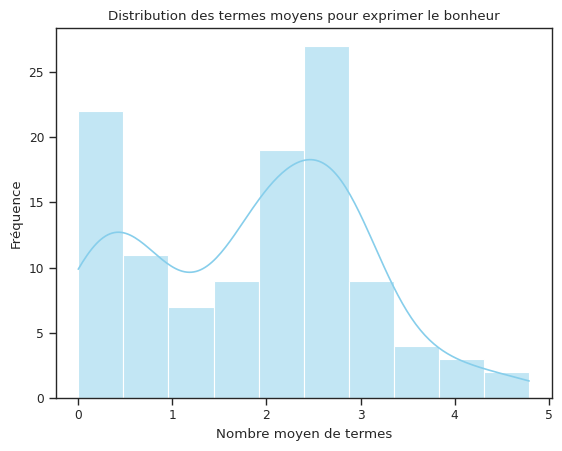

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution des termes moyens par pays
sns.histplot(dernier_df["Average_Number_of_Terms"], bins=10, kde=True, color="skyblue")
plt.title("Distribution des termes moyens pour exprimer le bonheur")
plt.xlabel("Nombre moyen de termes")
plt.ylabel("Fréquence")
plt.show()


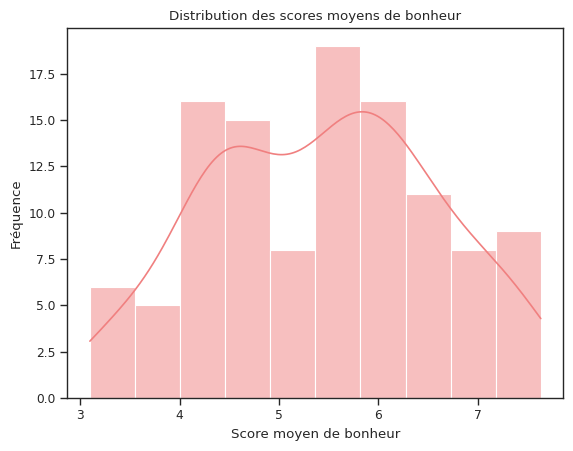

In [127]:
# Distribution du score moyen de bonheur par pays
sns.histplot(dernier_df["Average Happiness Score (2013-2023)"], bins=10, kde=True, color="lightcoral")
plt.title("Distribution des scores moyens de bonheur")
plt.xlabel("Score moyen de bonheur")
plt.ylabel("Fréquence")
plt.show()


## 4.2. Graphes bivariés

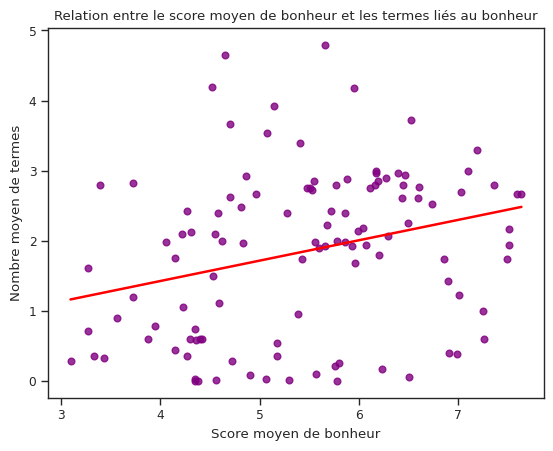

In [135]:
# Scatter plot avec droite de régression
sns.regplot(
    x=dernier_df["Average Happiness Score (2013-2023)"],
    y=dernier_df["Average_Number_of_Terms"],
    scatter_kws={'color': 'purple'},  # Couleur des points
    line_kws={'color': 'red'},  # Couleur de la droite de régression
    ci=None  # Pour ne pas afficher l'intervalle de confiance autour de la droite
)

plt.title("Relation entre le score moyen de bonheur et les termes liés au bonheur")
plt.xlabel("Score moyen de bonheur")
plt.ylabel("Nombre moyen de termes")
plt.show()


# 5. DATA MODELLING

In [137]:
# Calcul du coefficient de corrélation
correlation, p_value = pearsonr(
    dernier_df["Average Happiness Score (2013-2023)"],
    dernier_df["Average_Number_of_Terms"]
)

print(f"Coefficient de corrélation de Pearson : {correlation}")
print(f"Valeur p : {p_value}")


Coefficient de corrélation de Pearson : 0.2807503307804738
Valeur p : 0.002594829590913827


# 6. CONCLUSION

ok donc pour moi je remplis manuellement le truc excellel pour bien mettre les langues parlées au bon endroit ensuite je fais trouner le code juste avant et normalement toutes les langues seront attrbiuées donc la liste de langue non attribuées devraient etre vide.
ca donnera un dataset avec les pays et les langues parlées
de la on merge avec le dataset qui a le nombre de termes pour decrire le concept de happinness. et je veux plusieurs lignes ou y aura

Country	Languages Spoken	Happiness Score	Language	Terms for Happiness
France	[Français, Arabe]	6.5	Français	5
France	[Français, Arabe]	6.5	Arabe	4
Canada	[Français, Anglais]	7.0	Français	5
Canada	[Français, Anglais]	7.0	Anglais	6
Afghanistan	[Dari, Pashto]	3.6	Dari	3
Afghanistan	[Dari, Pashto]	3.6	Pashto	2

voila comme ca sans le happiness score. la pour chaque pays qui a plusieurs langue on donne un poids a chaque langue en fonction de la population qui la parle et on construit une nouvelle colonne avec "terms for happiness pondéré"

et BAM on peut enelver la colonne language et terms for happiness en laissant que "terms for happiness pondéré" par pays. on peut ensuite rajouter le happiness score.
ENSUITE IL NE RESTE PLUS QU'A UTILISER CES DEUX DERNIERES VARIABLES
FAIRE DES GRAPHIQUES MONOVARIéS
PUIS UN SCATTER PLOT
UN TEST STAT EN CONSEQUENCE
ET BAM UN BASE MAP

faudra aussi enelver les pays ou on a pas de langue parlée